# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [229]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
from math import ceil
from sklearn.preprocessing import RobustScaler
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

Итак, прочитаем нашу таблицу:

In [37]:
churn_data = pd.read_csv("ML-3_churn/churn.csv")
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [38]:
churn_data.info()# Ваш код здесь

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


В данных нет пропусков

In [9]:
churn_data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [13]:
churn_data.describe(include='object')
#Фамилия нам не нужна для предсказаний, 
# другие категориальные признаки не требуют предварительных преобразований перед горячим кодированием

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

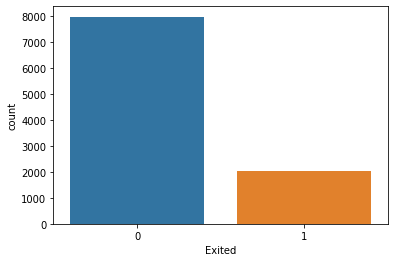

In [12]:
sns.countplot(data=churn_data, x='Exited');
# Классы не сбалансированы

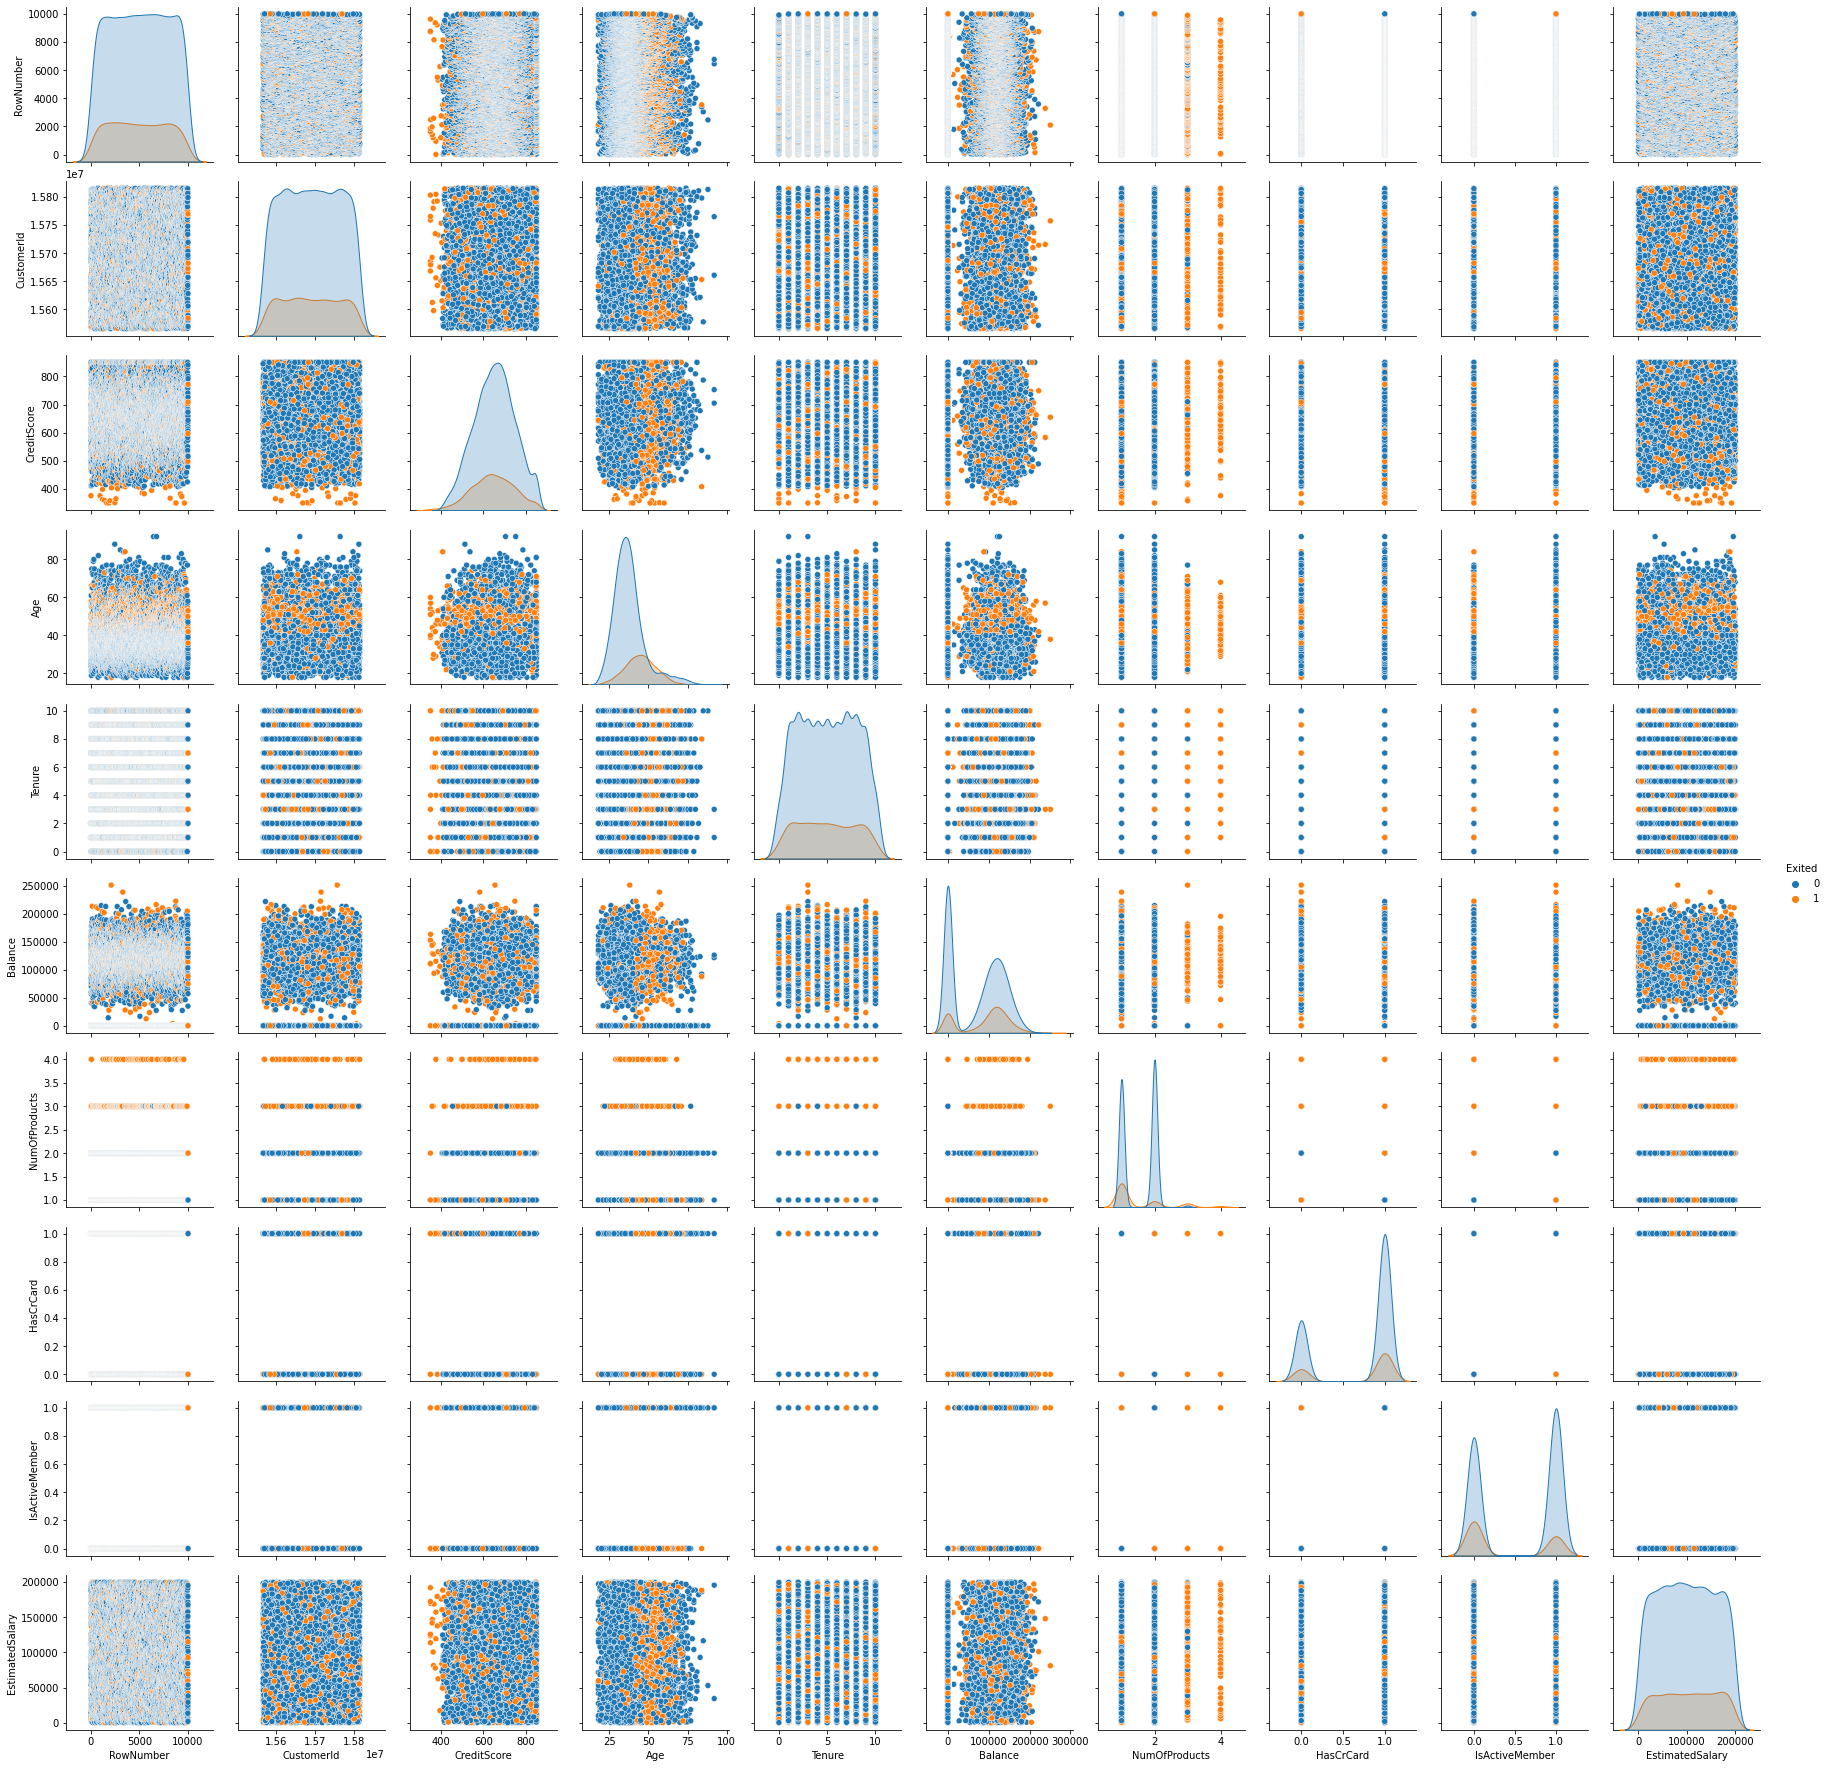

In [14]:
sns.pairplot(churn_data, hue = 'Exited');

В целом вижгл что ни одна из фичей не разделяет хорошо таргет переменную, посмотрим насколько хорошую модель все-ьаки получится построить


На графике возраст выглядит распределенным логнаормально, посмотрим на эту переменную поближе

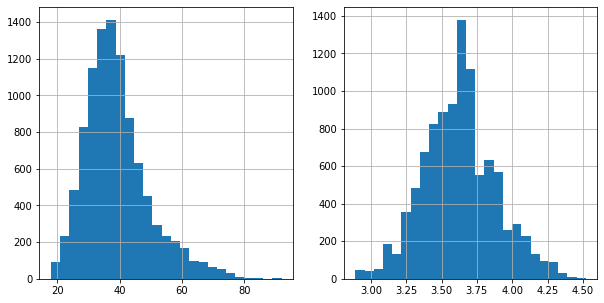

In [15]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
churn_data['Age'].hist(bins = 25)
plt.subplot(122)
churn_data['Age'].apply(lambda x: np.log(x)).hist(bins = 25);

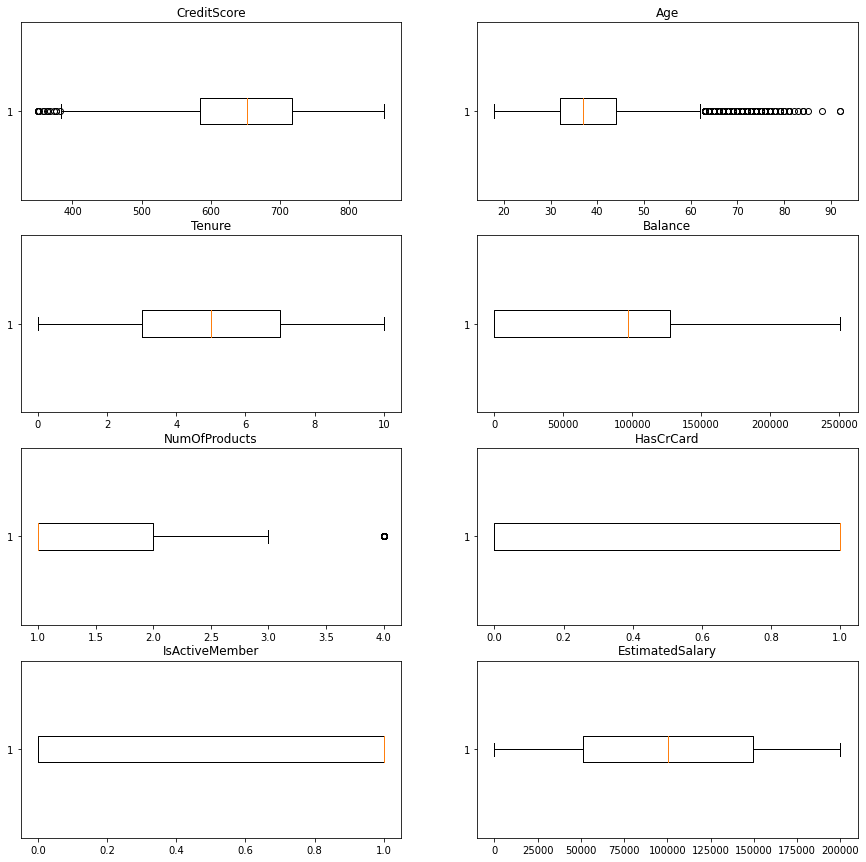

In [57]:
# уберем фамилию, клиентский номер и номер строки из фичей и проверим данные на мультиколинеарность,
# а так же увидим есть ли корреляция с таргетом
churn_data = churn_data.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1)
outlier_search = []

for col in churn_data.columns:
    if 'int' in churn_data[col].dtype.name or 'float' in churn_data[col].dtype.name:
        if col != 'Exited':
            outlier_search.append(col)

plt.figure(figsize = (15, 15))
for i, el in enumerate(outlier_search):
    plt.subplot(ceil(len(outlier_search)/2), 2, i+1)
    plt.boxplot(churn_data[el], vert = False)
    plt.title(el)

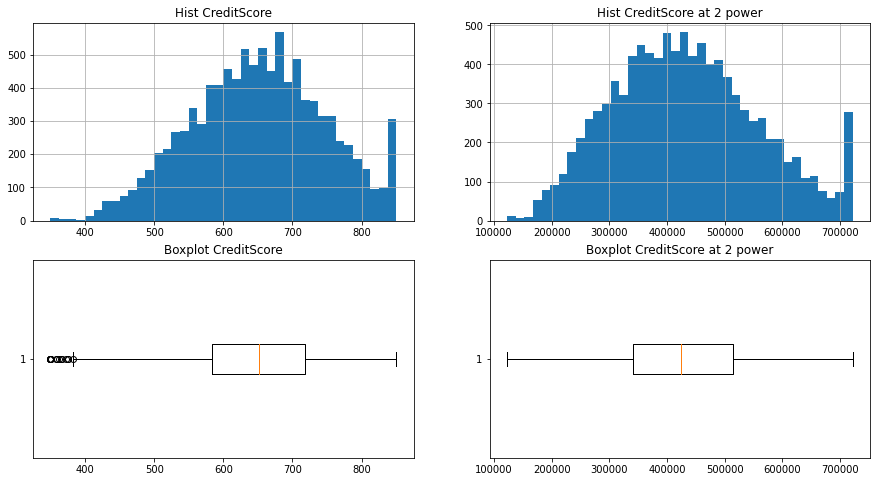

In [79]:
# переменную кредитный риск в будущем можно попробовать возвести в квадрат
plt.figure(figsize = (15, 8))
plt.subplot(221)
churn_data['CreditScore'].hist(bins = 40)
plt.title('Hist CreditScore')
plt.subplot(222)
churn_data['CreditScore'].apply(lambda x: (x)**2).hist(bins = 40)
plt.title('Hist CreditScore at 2 power')
plt.subplot(223)
plt.boxplot(churn_data['CreditScore'], vert = False)
plt.title('Boxplot CreditScore')
plt.subplot(224)
plt.boxplot(churn_data['CreditScore'].apply(lambda x: (x)**2), vert = False)
plt.title('Boxplot CreditScore at 2 power');


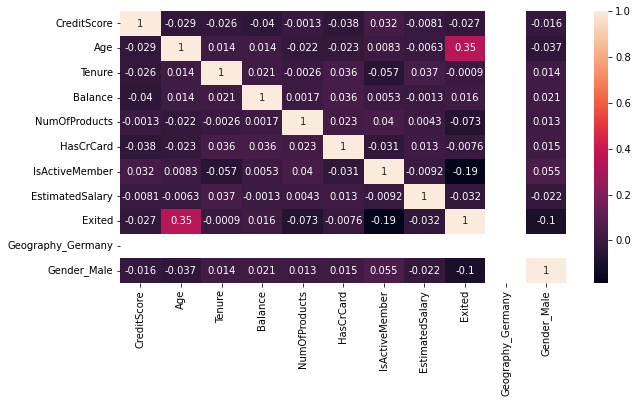

In [22]:
churn_data = pd.get_dummies(churn_data, drop_first=True)

plt.figure(figsize = (10, 5))
sns.heatmap(churn_data.corr(), annot = True);

в данных нет мультиколинеарных фичей, к сожалению хитмап подтвердил то что было видно на пейрплоте, нет сильно коррелирующих фичей с таргетом
более-менее сильные корреляции с таргетом у переменных: возраст, баланс активен ли клиент, проживает ли клиент в германии и полом


В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [84]:
churn_data = churn_data[churn_data['Geography_Germany'] == 1]
churn_data = churn_data.drop('Geography_Spain', axis = 1)
churn_data.shape

(2509, 11)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [23]:
# churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
# я уже сделала это выше
churn_data.head()

CreditScore       Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7           376  3.367296       4  115046.74              4          1   
15          616  3.806662       3  143129.41              2          0   
16          653  4.060443       1  132602.88              1          1   
26          756  3.583519       2  136815.64              1          1   
28          574  3.761200       3  141349.43              1          1   

    IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Gender_Male  
7                0        119346.88       1                  1            0  
15               1         64327.26       0                  1            1  
16               0          5097.67       1                  1            1  
26               1        170041.95       0                  1            1  
28               1        100187.43       0                  1            0

Проверим, что в наших данных нет пропусков:

In [24]:
churn_data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Gender_Male          0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [85]:
churn_data[churn_data.duplicated()].sum()

CreditScore          0.0
Age                  0.0
Tenure               0.0
Balance              0.0
NumOfProducts        0.0
HasCrCard            0.0
IsActiveMember       0.0
EstimatedSalary      0.0
Exited               0.0
Geography_Germany    0.0
Gender_Male          0.0
dtype: float64

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [26]:
# выше было видно что распределение возрастов в датасете походит на логнормальное, по этому 
# пологорифмуем колонку возраст 

churn_data['Age'] = churn_data['Age'].apply(lambda x: np.log(x))
churn_data['CreditScore'] = churn_data['CreditScore'].apply(lambda x: (x)**2)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Gender_Male'],
      dtype='object')

In [87]:
# Создадим колонки

churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/churn_data['Age']

Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [88]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [89]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [35]:
churn_data.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2509.000000  2509.000000  2509.000000    2509.000000    2509.000000   
mean    651.453567     3.649655     5.009964  119730.116134       1.519729   
std      98.168937     0.258246     2.935154   27022.006157       0.619420   
min     350.000000     2.890372     0.000000   27288.430000       1.000000   
25%     584.000000     3.465736     2.000000  102800.720000       1.000000   
50%     651.000000     3.637586     5.000000  119703.100000       1.000000   
75%     722.000000     3.806662     8.000000  137560.380000       2.000000   
max     850.000000     4.430817    10.000000  214346.960000       4.000000   

        HasCrCard  IsActiveMember  EstimatedSalary       Exited  \
count  2509.00000     2509.000000      2509.000000  2509.000000   
mean      0.71383        0.497409    101113.435102     0.324432   
std       0.45206        0.500093     58263.011501     0.468256   
min       0.00000        0.000000        11.580000     0.000000   
25%       0.00000        0.000000     51016.020000     0.000000   
50%       1.00000        0.000000    102397.220000     0.000000   
75%       1.00000        1.000000    151083.800000     1.000000   
max       1.00000        1.000000    199970.740000     1.000000   

       Geography_Germany  Gender_Male  BalanceSalaryRatio  TenureByAge  \
count             2509.0  2509.000000         2509.000000  2509.000000   
mean                 1.0     0.524512            9.024870     0.134303   
std                  0.0     0.499498          214.286020     0.087680   
min                  1.0     0.000000            0.192582     0.000000   
25%                  1.0     0.000000            0.783284     0.060606   
50%                  1.0     1.000000            1.197220     0.125000   
75%                  1.0     1.000000            2.400083     0.200000   
max                  1.0     1.000000        10614.655440     0.500000   

       CreditScoreGivenAge  
count          2509.000000  
mean             17.526487  
std               5.349558  
min               6.112676  
25%              13.686275  
50%              16.857143  
75%              20.852941  
max              46.388889

In [90]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [91]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [96]:
scaler = RobustScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Укажите название метрики и обоснования своего выбора здесь

F1 мера

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ваши рассуждения и ответ — *здесь*.


Я думаю что подходящей метрикой будут F1 мера
Для минимизации ложноположительных и ложноотрицательных срабатываний, оптимальным выбором метрики может быть F1-скор, которая учитывает как точность, так и полноту модели.

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [250]:
def metrics_graph(model, X_te, y_te):
    #Нас интересует только вероятность класса (второй столбец)
    y_test_proba_pred = model.predict_proba(X_te)[:, 1]
    #Для удобства завернем numpy-массив в pandas Series
    y_test_proba_pred = pd.Series(y_test_proba_pred)
    #Создадим списки, в которых будем хранить значения метрик 
    recall_scores = []
    precision_scores = []
    f1_scores = []
    #Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
    thresholds = np.arange(0.1, 1, 0.05)
    #В цикле будем перебирать сгенерированные пороги
    for threshold in thresholds:
        #В противном случае - к классу 0
        y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
        #Считаем метрики и добавляем их в списки
        recall_scores.append(metrics.recall_score(y_te, y_test_pred))
        precision_scores.append(metrics.precision_score(y_te, y_test_pred, zero_division=1))
        f1_scores.append(metrics.f1_score(y_te, y_test_pred))

    #Визуализируем метрики при различных threshold
    fig, ax = plt.subplots(figsize=(15, 4)) #фигура + координатная плоскость
    #Строим линейный график зависимости recall от threshold
    ax.plot(thresholds, recall_scores, label='Recall')
    #Строим линейный график зависимости precision от threshold
    ax.plot(thresholds, precision_scores, label='Precision')

    #Строим линейный график зависимости F1 от threshold
    ax.plot(thresholds, f1_scores, label='F1-score')
    #Даем графику название и подписи осям
    ax.set_title('Recall/Precision dependence on the threshold')
    ax.set_xlabel('Probability threshold')
    ax.set_ylabel('Score')
    ax.legend();

In [123]:
# Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, 
# установив конкретное значение параметра `random_state` (например, число 42).

#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=42, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      1271
           1       0.55      0.14      0.23       610

    accuracy                           0.68      1881
   macro avg       0.62      0.54      0.51      1881
weighted avg       0.65      0.68      0.62      1881

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       424
           1       0.55      0.15      0.24       204

    accuracy                           0.68       628
   macro avg       0.63      0.55      0.52       628
weighted avg       0.65      0.68      0.62       628



C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [157]:
m_test = metrics.f1_score(y_test, log_reg.predict(X_test_scaled))
m_train = metrics.f1_score(y_train, log_reg.predict(X_train_scaled))
print(f'Metric at Train = {m_train:.2f} \nMetric at Test = {m_test:.2f}')

Metric at Train = 0.23 
Metric at Test = 0.24


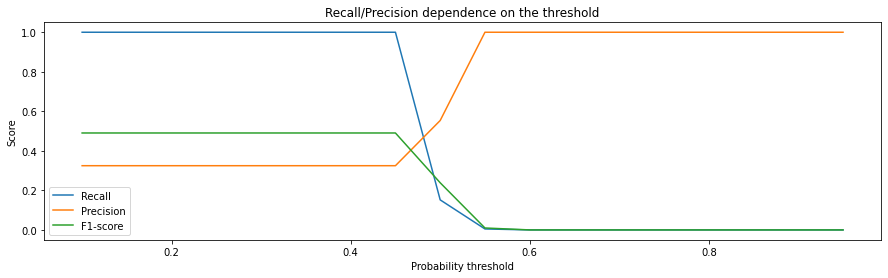

In [124]:
metrics_graph(log_reg, X_test_scaled, y_test)

In [151]:
y_test_pred_ = log_reg.predict(X_test_scaled)
y_test_pred = pd.Series(log_reg.predict_proba(X_test_scaled)[:, 1]).apply(lambda x: 1 if x>0.49 else 0)
#Вывод отчет о метриках классификации
print(f'With replasing trashholt to 0.49 F1 = {metrics.f1_score(y_test, y_test_pred):.2f},\
       \nWith standart Trashold F1= {metrics.f1_score(y_test, y_test_pred_):.2f}')

With replasing trashholt to 0.49 F1 = 0.53,       
With standart Trashold F1= 0.24


In [158]:
m_test = metrics.f1_score(y_test, y_test_pred)
m_train = metrics.f1_score(y_train, log_reg.predict(X_train_scaled))
print(f'Metric at Train = {m_train:.2f} \nMetric at Test = {m_test:.2f}')

Metric at Train = 0.23 
Metric at Test = 0.53


> Ваши выводы и рассуждения — *здесь*.

при пороге ниже 0,5, можно считать модель недообученной. Попробую обучить еще одну модель


In [212]:
#Создаем объект класса логистическая регрессия
best_c, test_F1 = 1, 0
for c in range(1, 100):
    log_reg = linear_model.LogisticRegression(
        solver='liblinear', #алгоритм оптимизации
        penalty='l1',
        random_state=42, #генератор случайных чисел
        max_iter=1000,
        C = c #количество итераций на сходимость
    )
    #Обучаем модель, минимизируя logloss
    log_reg.fit(X_train_scaled, y_train)
    m_f1 = metrics.f1_score(y_test, log_reg.predict(X_test_scaled))
    if m_f1 > test_F1:
        best_c = c
        test_F1 = m_f1

print(f'Best C is {best_c}, best F1 on test is {test_F1:.2f}')



Best C is 3, best F1 on test is 0.50


In [213]:
log_reg = linear_model.LogisticRegression(
        solver='liblinear', #алгоритм оптимизации
        penalty='l1',
        random_state=42, #генератор случайных чисел
        max_iter=1000,
        C = 3 #количество итераций на сходимость
    )
    #Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(f'Train F1: {metrics.f1_score(y_train, y_train_pred):.2f}\nTest F1: {metrics.f1_score(y_test, y_test_pred):.2f}')

Train F1: 0.52
Test F1: 0.50


In [209]:
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       424
           1       0.60      0.42      0.50       204

    accuracy                           0.72       628
   macro avg       0.68      0.64      0.65       628
weighted avg       0.71      0.72      0.71       628



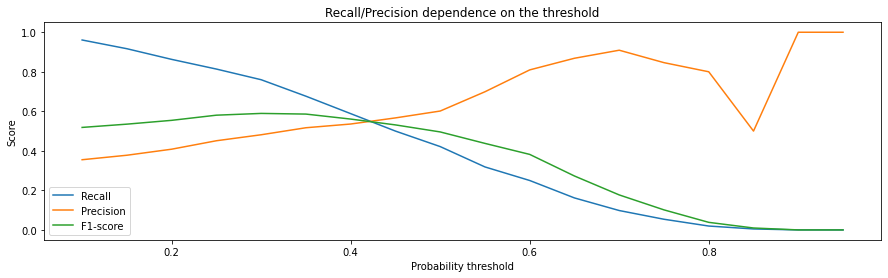

In [207]:
metrics_graph(log_reg, X_test_scaled, y_test)

In [208]:
y_test_pred_ = log_reg.predict(X_test_scaled)
y_test_pred = pd.Series(log_reg.predict_proba(X_test_scaled)[:, 1]).apply(lambda x: 1 if x>0.38 else 0)
#Вывод отчет о метриках классификации
print(f'With replasing trashholt to 0.32 F1 = {metrics.f1_score(y_test, y_test_pred):.2f},\
       \nWith standart Trashold F1= {metrics.f1_score(y_test, y_test_pred_):.2f}')

With replasing trashholt to 0.32 F1 = 0.58,       
With standart Trashold F1= 0.50


Так как на графиках я увидела не нормальное распределение принаков "кредитный рейтинг" и "возраст"
я попробовала привести их к нормальному виду, проведа разедление на трейн и тест,

скалировала данные с помощью робустскалера и обучила модель

результат оказался практически тем же 
на 1 сотую улучшилась метрика Ф1 на тесте (так же при смещении разделяющего порога, как сделано выше)

In [224]:
# выше было видно что распределение возрастов в датасете походит на логнормальное, по этому 
# пологорифмуем колонку возраст 
churn_data2 = churn_data
churn_data2['Age'] = churn_data2['Age'].apply(lambda x: np.log(x))
churn_data2['CreditScore'] = churn_data2['CreditScore'].apply(lambda x: (x)**2)
X2 = churn_data2.drop("Exited", axis=1)
y2 = churn_data2["Exited"]

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(
    X2, y2, 
    stratify=y, 
    random_state=0
)
scaler2 = RobustScaler()
scaler2 = scaler2.fit(X_train2)
X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

best_c, test_F1 = 1, 0
for c in range(1, 100):
    log_reg = linear_model.LogisticRegression(
        solver='liblinear', #алгоритм оптимизации
        penalty='l1',
        random_state=42, #генератор случайных чисел
        max_iter=1000,
        C = c #количество итераций на сходимость
    )
    #Обучаем модель, минимизируя logloss
    log_reg.fit(X_train_scaled, y_train)
    m_f1 = metrics.f1_score(y_test, log_reg.predict(X_test_scaled))
    if m_f1 > test_F1:
        best_c = c
        test_F1 = m_f1

print(f'Best C is {best_c}, best F1 on test is {test_F1:.2f}')

#Создаем объект класса логистическая регрессия
log_reg2 = linear_model.LogisticRegression(
    solver='liblinear', #алгоритм оптимизации
    penalty='l1',
    random_state=42, #генератор случайных чисел
    max_iter=1000,
    C = best_c #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg2.fit(X_train_scaled2, y_train2)

y_train_pred2 = log_reg2.predict(X_train_scaled2)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train2, y_train_pred2))

y_test_pred2 = log_reg2.predict(X_test_scaled2)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test2, y_test_pred2))

Best C is 3, best F1 on test is 0.50
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1271
           1       0.63      0.43      0.51       610

    accuracy                           0.73      1881
   macro avg       0.70      0.66      0.66      1881
weighted avg       0.72      0.73      0.72      1881

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       424
           1       0.61      0.43      0.50       204

    accuracy                           0.72       628
   macro avg       0.68      0.65      0.66       628
weighted avg       0.71      0.72      0.71       628



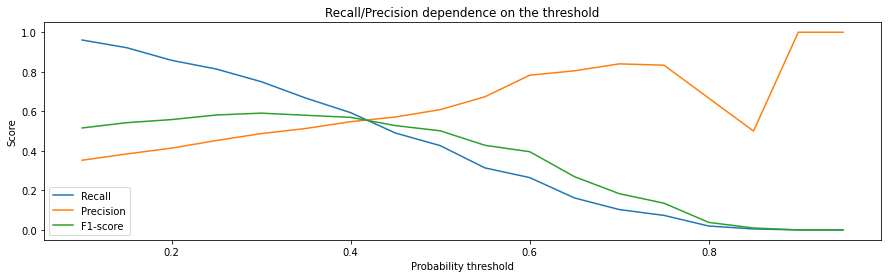

In [225]:
metrics_graph(log_reg2, X_test_scaled2, y_test2)

In [226]:
metrics.f1_score(y_test, log_reg2.predict(X_test_scaled2)), metrics.f1_score(y_train2, log_reg2.predict(X_train_scaled2))

(0.5014409221902018, 0.5135658914728681)

In [228]:
y_test_pred_2 = log_reg2.predict(X_test_scaled2)
y_test_pred2 = pd.Series(log_reg2.predict_proba(X_test_scaled2)[:, 1]).apply(lambda x: 1 if x>0.3 else 0)
#Вывод отчет о метриках классификации
print(f'With replasing trashholt to 0.49 F1 = {metrics.f1_score(y_test2, y_test_pred2):.2f},\
       \nWith standart Trashold F1= {metrics.f1_score(y_test2, y_test_pred_2):.2f}')

With replasing trashholt to 0.49 F1 = 0.59,       
With standart Trashold F1= 0.50


После добавления регуляризации в модель а так же коеффициента С удалось улучшить предсказания модели на классе объектов 1 (клиенты отказавшиеся от услуг компании)

лучший результат метрики Ф1 на тесте = 0,58 (после перемещения гриницы разделяющей классы)

если преобразовать две перменных (возраст (пологорифмировать) и кредитный рейтинг (возвести в квадрат)) то удается построить модель в которой после перемещения трешхолда можно получить результат на тесте 0,59

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [290]:
# Ваш код здесь
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [291]:
#чтобы не играться вручную, сделаю что-то типа базового гридсерча
best_c, test_F1, regul = 1, 0, None
for c in tqdm(range(1, 1000)):
    for reg in ['l1', 'l2']:
        
        log_reg_poly = linear_model.LogisticRegression(
            solver='liblinear', #алгоритм оптимизации
            penalty=reg,
            random_state=42, #генератор случайных чисел
            max_iter=1000,
            C = c #количество итераций на сходимость
        )
        #Обучаем модель, минимизируя logloss
        log_reg_poly.fit(X_train_poly, y_train)
        m_f1 = metrics.f1_score(y_test, log_reg_poly.predict(X_test_poly))
        if m_f1 > test_F1:
            best_c, test_F1, regul = c, m_f1, reg

print(f'Best C is {best_c}, best type of regularisatio is {reg} best F1 on test is {test_F1:.2f}')
log_reg_poly = linear_model.LogisticRegression(
            solver='liblinear', #алгоритм оптимизации
            penalty=regul,
            random_state=42, #генератор случайных чисел
            max_iter=1000,
            C = best_c #количество итераций на сходимость
        )
        #Обучаем модель, минимизируя logloss
log_reg_poly.fit(X_train_poly, y_train)


y_train_pred = log_reg_poly.predict(X_train_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg_poly.predict(X_test_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

100%|██████████| 999/999 [01:50<00:00,  9.07it/s]

Best C is 6, best type of regularisatio is l2 best F1 on test is 0.65
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1271
           1       0.83      0.70      0.76       610

    accuracy                           0.85      1881
   macro avg       0.85      0.81      0.83      1881
weighted avg       0.85      0.85      0.85      1881

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.60      0.65       204

    accuracy                           0.79       628
   macro avg       0.77      0.74      0.75       628
weighted avg       0.79      0.79      0.79       628



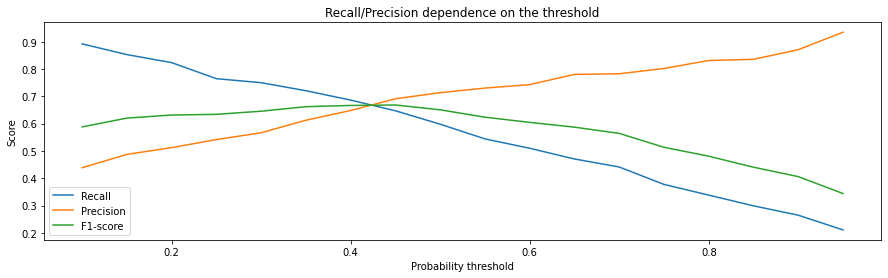

In [256]:
metrics_graph(log_reg_poly, X_test_poly, y_test)

In [258]:
m_te, m_tr = metrics.f1_score(y_test, log_reg_poly.predict(X_test_poly)), metrics.f1_score(y_train, log_reg_poly.predict(X_train_poly))

print(f'F1 metric at train = {m_tr:.2f}\nF1 metric at test = {m_te:.2f}')

F1 metric at train = 0.76
F1 metric at test = 0.65


In [267]:
y_test_pred_ = log_reg_poly.predict(X_test_poly)
y_test_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1]).apply(lambda x: 1 if x>0.45 else 0)
#Вывод отчет о метриках классификации
print(f'With replasing trashholt to 0.45 F1 = {metrics.f1_score(y_test, y_test_pred):.2f},\
       \nWith standart Trashold F1= {metrics.f1_score(y_test, y_test_pred_):.2f}')

With replasing trashholt to 0.45 F1 = 0.67,       
With standart Trashold F1= 0.65


> Ваши выводы и рассуждения — *здесь*

Видно что полиномиальные признаки и подбор гиберпараметров дали достаточно хороший результат

удалось значительно улучшить метрику на тесте 

Ф1 на тесте равна 0.65, если немного "подвинуть" порог то становится 0.67

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [299]:
# Ваш код здесь
best_th, best_f1 = 0, 0

for t in tqdm(np.arange(0.1, 1, 0.05)):
       y_test_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1]).apply(lambda x: 1 if x>t else 0)
       if metrics.f1_score(y_test, y_test_pred) > best_f1:
              best_f1, best_th = metrics.f1_score(y_test, y_test_pred), t


print(f'With remoaving trashhold to {best_th:.2f} F1 = {best_f1:.2f},\
              \nWith standart Trashold F1= {metrics.f1_score(y_test, log_reg_poly.predict(X_test_poly)):.2f}')

100%|██████████| 18/18 [00:00<00:00, 227.50it/s]

With remoaving trashhold to 0.45 F1 = 0.67,              
With standart Trashold F1= 0.65


## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [309]:
churn_data = pd.read_csv("ML-3_churn/churn.csv")
churn_data.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [310]:
churn_data = churn_data.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1)
churn_data = pd.get_dummies(churn_data, drop_first=True)
churn_data = churn_data[churn_data['Geography_Germany'] == 1]
churn_data = churn_data.drop('Geography_Spain', axis = 1)
# Создадим колонки

churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/churn_data['Age']

In [312]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Импортируем необходимые для выполнения практики модули:

In [313]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [316]:
# Ваш код здесь
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X_train, y_train)

y_pred_train = dt_clf_2d.predict(X_train)
y_pred_test = dt_clf_2d.predict(X_test)
#Выводим отчёт о метриках
print(f'F1 at train = {metrics.f1_score(y_train, y_pred_train):.2f}\nF1 at tess = {metrics.f1_score(y_test, y_pred_test):.2f}')

F1 at train = 1.00
F1 at tess = 0.56


> Ваши выводы и рассуждения — *здесь*

Метрика на трейне выше метрики на тесте, что говорит о переобучении модели, то есть модель просто подстоилась под тестовую выборку. Что в целом логично, так как не указаны криетрии остановки (глубина модели или минимальное количество элементов в листьях)

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [331]:
# Ваш код здесь
# Ваш код здесь
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42,
    max_depth=8,
    min_samples_leaf=10
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X_train, y_train)

y_pred_train = dt_clf_2d.predict(X_train)
y_pred_test = dt_clf_2d.predict(X_test)
#Выводим отчёт о метриках
print(f'F1 at train = {metrics.f1_score(y_train, y_pred_train):.2f}\nF1 at tess = {metrics.f1_score(y_test, y_pred_test):.2f}')

F1 at train = 0.72
F1 at tess = 0.66


> Ваши выводы и рассуждения — *здесь*

На трейне метрика стала меньше, но на тесте метрика выросла. В целом уже тут значения метрики такие же как те что удалось получить с помощью логистической регрессии

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [332]:
# Ваш код здесь
#Создаём объект класса случайный лес
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X_train, y_train)

#Делаем предсказание класса

y_pred_train_ = rf_clf_2d.predict(X_train)
y_pred_test_ = rf_clf_2d.predict(X_test)
#Выводим отчёт о метриках
print(f'F1 at train = {metrics.f1_score(y_train, y_pred_train_):.2f}\nF1 at tess = {metrics.f1_score(y_test, y_pred_test_):.2f}')

F1 at train = 0.73
F1 at tess = 0.65


> Ваши выводы и рассуждения — *здесь*
Из моего не большого опыта, случайный лес обычно дает лучшие показатели чем одно дерево, однако в данном случае метрика стала немного меньше. Потенциально можно "поиграть" с параметрами глубины, и количестве элементов в одном листе, но в задании этого не предусмотрено

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

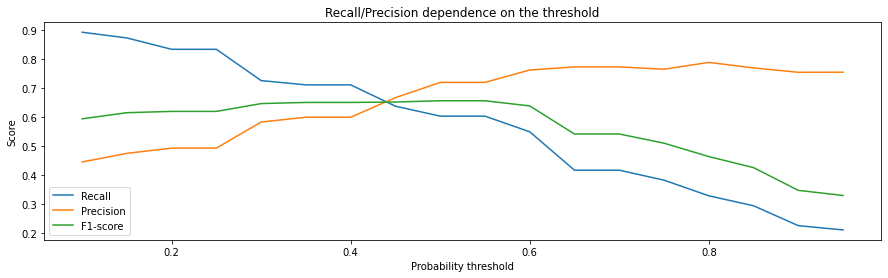

In [333]:
metrics_graph(dt_clf_2d, X_test, y_test)

In [335]:
# Ваш код здесь
best_th, best_f1 = 0, 0

for t in tqdm(np.arange(0.1, 1, 0.05)):
       y_test_pred = pd.Series(dt_clf_2d.predict_proba(X_test)[:, 1]).apply(lambda x: 1 if x>t else 0)
       if metrics.f1_score(y_test, y_test_pred) > best_f1:
              best_f1, best_th = metrics.f1_score(y_test, y_test_pred), t


print(f'With remoaving trashhold to {best_th:.2f} F1 = {best_f1:.2f},\
              \nWith standart Trashold F1= {metrics.f1_score(y_test, dt_clf_2d.predict(X_test)):.2f}')

100%|██████████| 18/18 [00:00<00:00, 251.99it/s]

With remoaving trashhold to 0.50 F1 = 0.66,              
With standart Trashold F1= 0.66


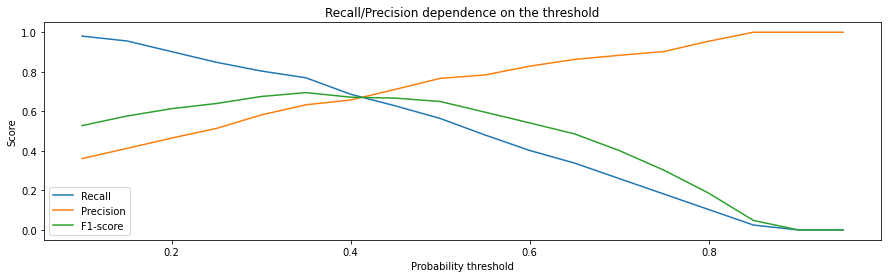

In [330]:
# Ваш код здесь
metrics_graph(rf_clf_2d, X_test, y_test)

In [336]:
# Ваш код здесь
best_th, best_f1 = 0, 0

for t in tqdm(np.arange(0.1, 1, 0.05)):
       y_test_pred = pd.Series(rf_clf_2d.predict_proba(X_test)[:, 1]).apply(lambda x: 1 if x>t else 0)
       if metrics.f1_score(y_test, y_test_pred) > best_f1:
              best_f1, best_th = metrics.f1_score(y_test, y_test_pred), t


print(f'With remoaving trashhold to {best_th:.2f} F1 = {best_f1:.2f},\
              \nWith standart Trashold F1= {metrics.f1_score(y_test, rf_clf_2d.predict(X_test)):.2f}')

100%|██████████| 18/18 [00:01<00:00, 10.85it/s]

With remoaving trashhold to 0.35 F1 = 0.69,              
With standart Trashold F1= 0.65


> Ваши выводы и рассуждения — *здесь*

изначально случайный лес не дал результатов лучше чем просто одно дерево, на на графике перемещения порога видно что модель случайного леса устойчивее (график более плавный)

при перемещении порога у одного дерева - лучших показателей добиться не удалось
однако при перемещении порога в модели случайного леса, удалось улучшить метрику на тесте до 0,65

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [350]:
# Ваш код здесь
vasily = pd.DataFrame({
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
})
vasily

CreditScore Gender   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        601.0   Male  42.0     1.0  98495.72            1.0        1.0   

   IsActiveMember  EstimatedSalary  
0             0.0         40014.76

In [351]:
# Создадим колонки
vasily = vasily.drop('Gender', axis = 1)
vasily['Geography_Germany'] = 1
vasily['BalanceSalaryRatio'] = vasily['Balance']/vasily['EstimatedSalary']
vasily['TenureByAge'] = vasily['Tenure']/vasily['Age']
vasily['CreditScoreGivenAge'] = vasily['CreditScore']/vasily['Age']
vasily['Gender_Male'] = 1


In [358]:
vasily_pred = pd.Series(rf_clf_2d.predict_proba(vasily)[:, 1]).apply(lambda x: 1 if x> best_th else 0)
is_churn = ('YES' if vasily_pred[0] == 1 else 'NO')
print(f'Does Vasily plane to churn?\nAnswer is: {is_churn}')

Does Vasily plane to churn?
Answer is: YES
